In [1]:
import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('DATASET'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

DATASET\TEST\downdog\00000000.jpg
DATASET\TEST\downdog\00000001.JPG
DATASET\TEST\downdog\00000002.jpg
DATASET\TEST\downdog\00000003.jpg
DATASET\TEST\downdog\00000004.jpg
DATASET\TEST\downdog\00000005.jpg
DATASET\TEST\downdog\00000006.jpg
DATASET\TEST\downdog\00000007.jpg
DATASET\TEST\downdog\00000008.jpg
DATASET\TEST\downdog\00000009.jpg
DATASET\TEST\downdog\00000010.png
DATASET\TEST\downdog\00000011.jpg
DATASET\TEST\downdog\00000012.jpg
DATASET\TEST\downdog\00000013.jpg
DATASET\TEST\downdog\00000014.jpg
DATASET\TEST\downdog\00000016.jpg
DATASET\TEST\downdog\00000017.png
DATASET\TEST\downdog\00000018.jpg
DATASET\TEST\downdog\00000019.jpg
DATASET\TEST\downdog\00000020.jpg
DATASET\TEST\downdog\00000021.jpg
DATASET\TEST\downdog\00000022.jpg
DATASET\TEST\downdog\00000023.jpg
DATASET\TEST\downdog\00000024.jpg
DATASET\TEST\downdog\00000025.jpg
DATASET\TEST\downdog\00000026.jpg
DATASET\TEST\downdog\00000027.jpg
DATASET\TEST\downdog\00000029.jpg
DATASET\TEST\downdog\00000030.jpg
DATASET\TEST\d

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
train_path = 'DATASET/TRAIN'

test_path = 'DATASET/TEST'

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['downdog', 'tree','plank', 'goddess'], batch_size=10)

Found 829 images belonging to 4 classes.


In [10]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['downdog', 'tree','plank', 'goddess'], batch_size=10, shuffle=False)

Found 361 images belonging to 4 classes.


In [11]:
assert train_batches.n == 829
#assert valid_batches.n == 200
assert test_batches.n == 361
assert train_batches.num_classes == test_batches.num_classes == 4

In [12]:
imgs, labels = next(train_batches)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

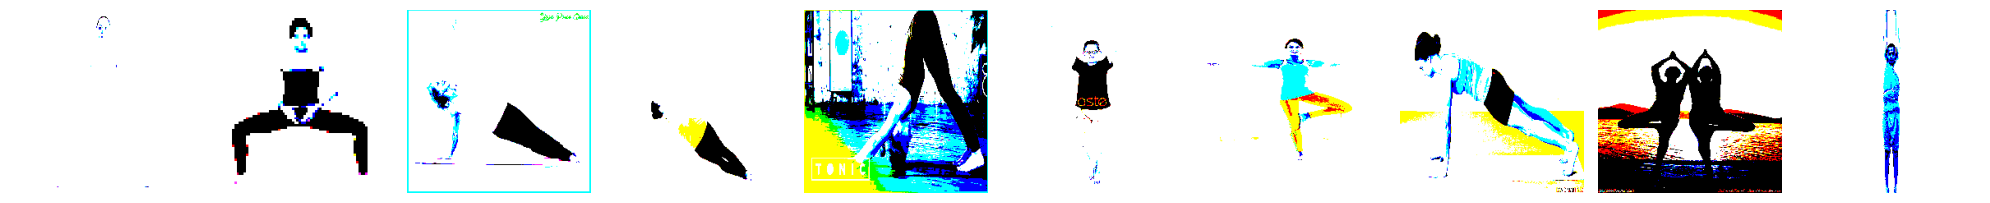

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [14]:
plotImages(imgs)
print(labels)

In [20]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=4, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [38]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches)//4,
    validation_data = test_batches,
    validation_steps = len(test_batches)//4,epochs=25)

Epoch 1/25
 7/20 [=========>....................] - ETA: 3s - loss: 0.2599 - accuracy: 0.9000

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 7s 360ms/step - loss: 0.2470 - accuracy: 0.9000 - val_loss: 2.5209 - val_accuracy: 0.6000
Epoch 2/25
20/20 [==============================] - 7s 349ms/step - loss: 0.2057 - accuracy: 0.9200 - val_loss: 1.1745 - val_accuracy: 0.7889
Epoch 3/25
20/20 [==============================] - 7s 339ms/step - loss: 0.0688 - accuracy: 0.9650 - val_loss: 0.9789 - val_accuracy: 0.8000
Epoch 4/25
20/20 [==============================] - 6s 315ms/step - loss: 0.1154 - accuracy: 0.9450 - val_loss: 1.5782 - val_accuracy: 0.7000
Epoch 5/25
20/20 [==============================] - 7s 329ms/step - loss: 0.1864 - accuracy: 0.9447 - val_loss: 1.2330 - val_accuracy: 0.7667
Epoch 6/25
20/20 [==============================] - 6s 325ms/step - loss: 0.0448 - accuracy: 0.9900 - val_loss: 1.0781 - val_accuracy: 0.8222
Epoch 7/25
20/20 [==============================] - 7s 329ms/step - loss: 0.0996 - accuracy: 0.9700 - val_loss: 0.8368 - val_accuracy: 0.8556
Epoch 8/25
20/20 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

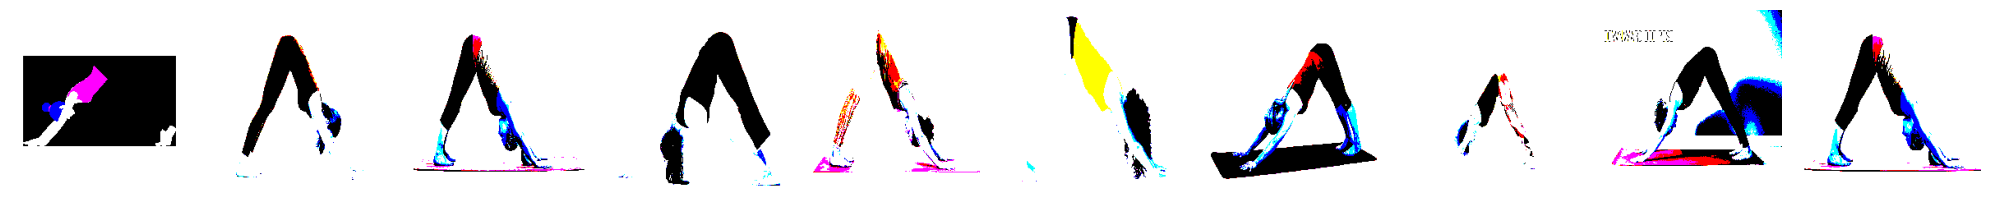

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [39]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [41]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [42]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [43]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
test_batches.class_indices

{'downdog': 0, 'tree': 1, 'plank': 2, 'goddess': 3}

Confusion matrix, without normalization
[[74  0 18  5]
 [ 3 58  4  4]
 [10  3 97  5]
 [ 9  5  8 58]]


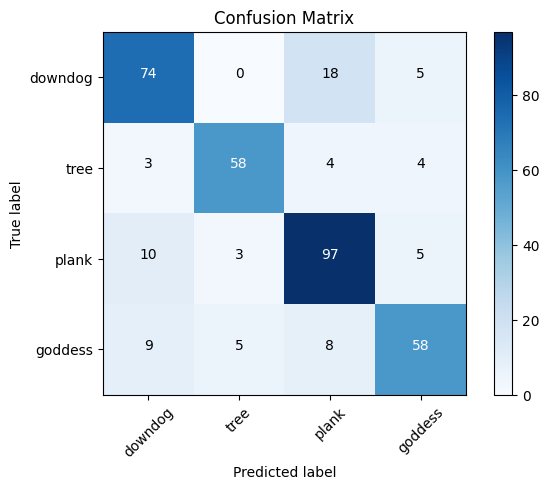

In [46]:
cm_plot_labels = ['downdog', 'tree', 'plank', 'goddess']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [47]:
accuracy = np.trace(cm) / np.sum(cm)

In [48]:
accuracy

0.7950138504155124